## Description
Fashion_MNIST data and description is available on github: https://github.com/zalandoresearch/fashion-mnist <br>

It consists of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes as given below:

**Label 	Description** <br>
0 	T-shirt/top <br>
1 	Trouser <br>
2 	Pullover <br>
3 	Dress <br>
4 	Coat <br>
5 	Sandal <br>
6 	Shirt <br>
7 	Sneaker <br>
8 	Bag <br>
9 	Ankle boot <br>

**Points to be Noted**
1. Each image is of size 28x28 = 784 pixels.
2. Grayscale images have a total of 255 shades/pixels ranges from 0 to 255 to define how much dark or light that pixel will be. 0 = Maximum Dark; 255 = Maximum White.
3. Each row is a separate image and column as labels (0-9).

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite" width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

## Import Modules

In [1]:
# !pip install -U tensorflow==2.0.0-beta1  # to install tensorflow 2.0-beta1 in Kaggle notebook
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
print(tf.__version__)   # prints tensorflow installed version
from tensorflow import keras

1.15.0


## Download Fashion MNIST Data
Since this data is already added in tensorflow and an api is created. So, we can directly use that api to directly downlaod the data from server.

In [2]:
mnist = tf.keras.datasets.fashion_mnist
(x_total_training_images, y_total_training_labels), (x_testing_images, y_testing_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## Prints some of the Loaded Dataset
Notice all the values of pixels ranges from 0-255 because of grayscale images

uint8
(60000, 28, 28)
3
[[  0   0   0   0   0   0   0   3   0   0   0  19 204  93  35  91 227  91
    0   0   0   3   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2   0   0 134 210 237 241 241 255 245 238 241
  248 111   0   0   3   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 175 254 235 233 232 225 227 226 229 231
  236 250 200   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   2 240 229 228 219 215 235 229 234 217 198
  222 220 255 101   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  46 246 236 189 173 212 240 226 239 210 152
  177 222 249 170   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  97 255 233 226 231 237 230 231 231 236 241
  232 231 245 210   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 150 252 234 239 232 228 228 229 228 228 233
  242 236 243 233   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 195 249 234 243 234 232 231 230 230 229 234
  242 227 239 219   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 228 248 22

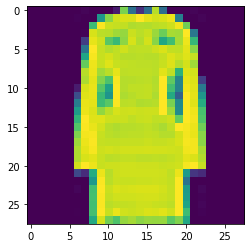

In [3]:
import matplotlib.pyplot as plt

print(x_total_training_images.dtype)
print(x_total_training_images.shape)
print(y_total_training_labels[500])  # Display the training label for the image number passed ranges from 0-59999
print(x_total_training_images[500])      # Display the training image data correponding to number passed

plt.imshow(x_total_training_images[500]) # Display the image correponding to index passed
#plt.imshow(x_total_training_images[59990], cmap='gray')  # Display image in grayscale

## Split Datset into training and validation

In [0]:
x_validation_images = x_total_training_images[:5000]
x_training_images = x_total_training_images[5000:]
y_validation_labels = y_total_training_labels[:5000]
y_training_labels = y_total_training_labels[5000:]

## Normalize the Input Dataset
Data required by Neural network ranges from -1 to 1 or 0 to 1. So, we can do it simply by dividing each image pixel with 255

In [0]:
# x_training_images = x_training_images.astype('float32')
# x_test_images = x_test_images.astype('float32')
x_training_images  = x_training_images / 255.0  # divide by 255.0 to make output as float32 value
x_testing_images = x_testing_images / 255.0
x_validation_images = x_validation_images/255.0

## Create a List of class Names

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

print(class_names[y_training_labels[0]])
print(class_names[y_training_labels[1]])

Coat
T-shirt/top


## Define the Model
Sequential: That defines a SEQUENCE of layers in the neural network

Flatten: It takes the input 2d image (for eg. 28x28) and converts or flatten it into a 1 dimensional vector (784).

Dense: Adds a layer of neurons

Each layer of neurons need an activation function to tell them what to do. 
Relu effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

Softmax takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it converts it into [0,0,0,0,1,0,0,0,0] and gives the biggest value


In [0]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)), 
                                    tf.keras.layers.Dense(128, activation="relu"), # added 1st layer with 128 neurons
                                    tf.keras.layers.Dense(10, activation="softmax")]) # Added 2nd/Output layer with 10 neurons because our output is catagorized into 10 classes

## Print model summary of number of parameters trained

Here "none" in `Output Shape` indicates that the batch size can be anything. <br>
`Param` of "100480" in 2nd layer comes from 784 pixels X 128 =  100352. <br>There will be 128 biases for each neuron. So, 100352 + 128 = 100480

In [43]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Explore Layers

In [45]:
print(model.layers)
print(model.get_layer(index=1))
print(model.layers[1].name)
weights, biases = model.layers[1].get_weights()
print(weights.shape)
# weights
biases

[<tensorflow.python.keras.layers.core.Flatten object at 0x7eff09428780>, <tensorflow.python.keras.layers.core.Dense object at 0x7eff09428f28>, <tensorflow.python.keras.layers.core.Dense object at 0x7eff09428cc0>]
dense_9
(784, 128)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

## Compile & Train the Model
Notice the Loss and accuracy on completion. Both should be inversely proportional to each other. The EPOCH's can be set to value untill the Loss keeps on going down and accuracy keep son increasing

In [46]:
"""Use CategoricalCrossentropy loss function when there are two or more label classes. It expects labels to be 
provided in a one_hot representation. 
If you want to provide labels as integers, use SparseCategoricalCrossentropy loss."""

model.compile(optimizer = 'Adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
# Train the model
history = model.fit(x_training_images, y_training_labels, epochs=30, validation_data=(x_validation_images,y_validation_labels))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 4s 65us/sample - loss: 0.5019 - acc: 0.8233 - val_loss: 0.3831 - val_acc: 0.8640
Epoch 2/30
55000/55000 [==============================] - 4s 64us/sample - loss: 0.3770 - acc: 0.8630 - val_loss: 0.3621 - val_acc: 0.8734
Epoch 3/30
55000/55000 [==============================] - 4s 64us/sample - loss: 0.3398 - acc: 0.8744 - val_loss: 0.3484 - val_acc: 0.8702
Epoch 4/30
55000/55000 [==============================] - 3s 63us/sample - loss: 0.3165 - acc: 0.8829 - val_loss: 0.3230 - val_acc: 0.8852
Epoch 5/30
55000/55000 [==============================] - 3s 63us/sample - loss: 0.2976 - acc: 0.8894 - val_loss: 0.3133 - val_acc: 0.8886
Epoch 6/30
55000/55000 [==============================] - 3s 63us/sample - loss: 0.2832 - acc: 0.8942 - val_loss: 0.3097 - val_acc: 0.8894
Epoch 7/30
55000/55000 [==============================] - 3s 64us/sample - loss: 0.2711 - acc: 0.8995 - val_loss: 0.3

In [47]:
df = pd.DataFrame(data=history.history)
df

,loss,acc,val_loss,val_acc
0,0.501872,0.823345,0.383129,0.8640
1,0.376993,0.863000,0.362075,0.8734
2,0.339807,0.874364,0.348443,0.8702
3,0.316500,0.882873,0.322972,0.8852
4,0.297635,0.889364,0.313308,0.8886
5,0.283152,0.894218,0.309716,0.8894
6,0.271123,0.899527,0.313635,0.8888
7,0.260617,0.902855,0.310248,0.8896
8,0.250568,0.906145,0.307635,0.8878
9,0.242426,0.909364,0.304391,0.8934


## Ploting the result
The opposite direction of validation loss shows that model starts over fitting

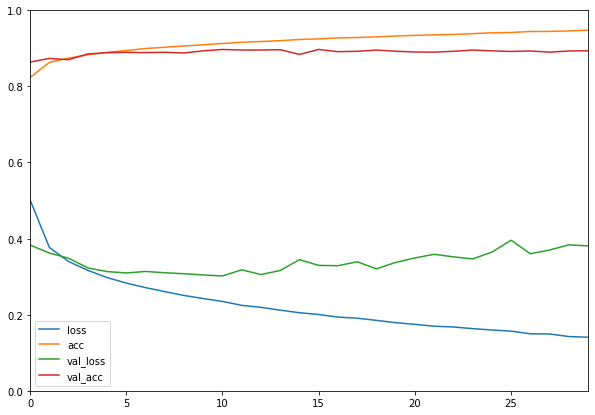

In [59]:
df.plot(figsize=(10,7))
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

## Test the Model using Test set
It returns the loss value & Accuracy for test data. This is the step where the model is given with new unseen images to check how well it has learned.
Notice that Loss and Accuracy will be somewhat lesser that the training Loss and accuracy but its fine


In [60]:
test_score = model.evaluate(x_testing_images, y_testing_labels)  # Returns the loss value & accuracy of model in test mode. Computation is done in batches.
print(test_score)
print(f"Test Loss = {test_score[0]}")
print(f"Test Accuracy = {test_score[1]}")

10000/10000 [==============================] - 0s 44us/sample - loss: 0.4007 - acc: 0.8896
[0.40068967948555945, 0.8896]
Test Loss = 0.40068967948555945
Test Accuracy = 0.8895999789237976


## Use trained model to do Predictions.
Since we dont have the image other than testing and training. So, lets do some prediction on test data. <br>
It returns the a list of 10 numbes which shows the prediction probability for a given image for classes `0 to 9`. Or it is like how much confident the model is to predict which class the given image belogs to.



[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Bag 8


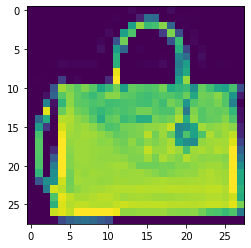

In [73]:
LABEL_NUMBER = 30

# Returns numpy array of predictions
classifications = model.predict(x_testing_images)  # generates output predictions for input samples. Computation is done in batches

print(classifications[LABEL_NUMBER].round(2))
print(class_names[y_testing_labels[LABEL_NUMBER]], y_testing_labels[LABEL_NUMBER])

#print(y_testing_labels[0])
plt.imshow(x_testing_images[LABEL_NUMBER]) # Display the image correponding to index passed